In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
netflix = pd.read_csv("Netflix Userbase.csv")

In [3]:
#verimizin bir kopyasını oluşturalım
df = netflix.copy()

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
#Boş değer olup olmadığına bakalım
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [6]:
#Tekrarlayan verilere bakalım
df.loc[df.duplicated()]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,2500.0,1250.5000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.00,12.0,14.00,15.0
Age,2500.0,38.7956,7.171778,26.0,32.00,39.0,45.00,51.0


In [9]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])
df["Plan Duration (Days)"] = (df["Last Payment Date"] - df["Join Date"]).dt.days
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Plan Duration (Days)
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174


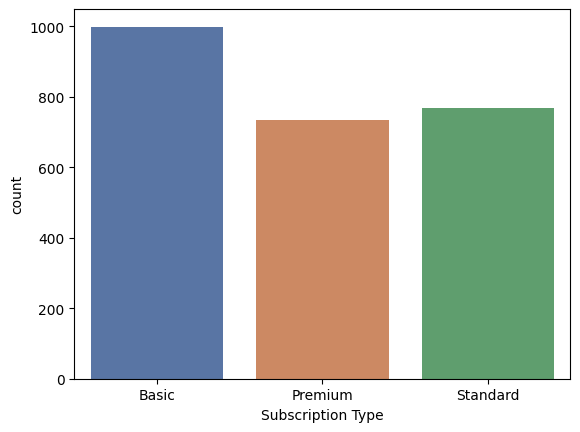

<Figure size 800x600 with 0 Axes>

In [10]:
sns.countplot(data = df,
              x = "Subscription Type",
             palette = "deep")
plt.figure(figsize = (8,6))
sns.set_theme(style = "whitegrid")
plt.show()

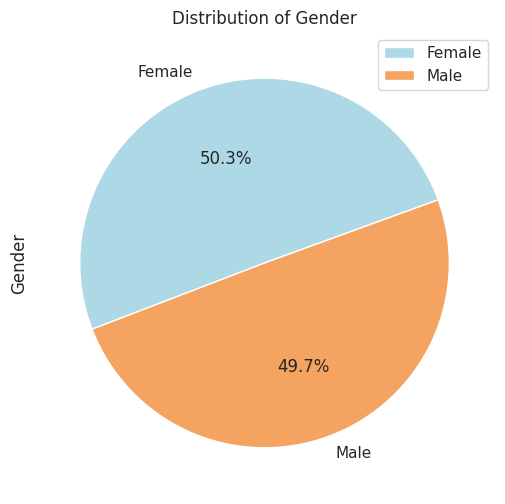

In [11]:
gender_count = df["Gender"].value_counts()
plt.figure(figsize=(8,6))

gender_count.plot(kind = 'pie',
                  autopct='%1.1f%%',
                  colors = ['lightblue', 'sandybrown'],
                 startangle=20)

plt.title('Distribution of Gender')
plt.legend(gender_count.index, loc = 'best')
plt.show()

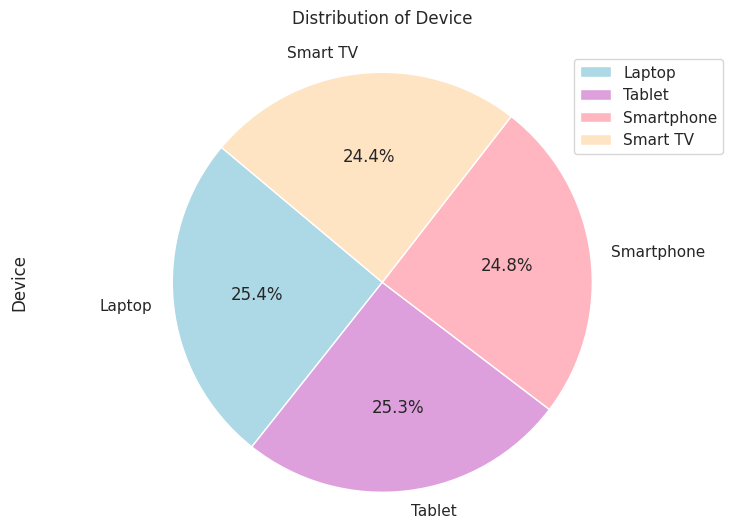

In [12]:
device_count = df["Device"].value_counts()
plt.figure(figsize = (9,6))

device_count.plot(kind = 'pie',
                  autopct='%1.1f%%',
                  colors = ["lightblue", "plum", "lightpink", "bisque"],
                  startangle = 140)

plt.title("Distribution of Device", pad = 20)
plt.axis("equal")
plt.legend(device_count.index, loc = 'best')
plt.show()

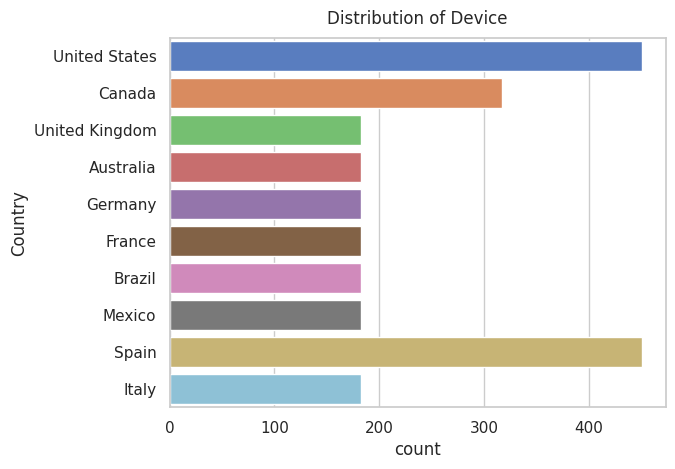

In [13]:
sns.countplot(data = df,
              y ='Country',
             palette = 'muted')
sns.set_theme(style = "whitegrid")
plt.title("Distribution of Device", pad = 10)
plt.show()

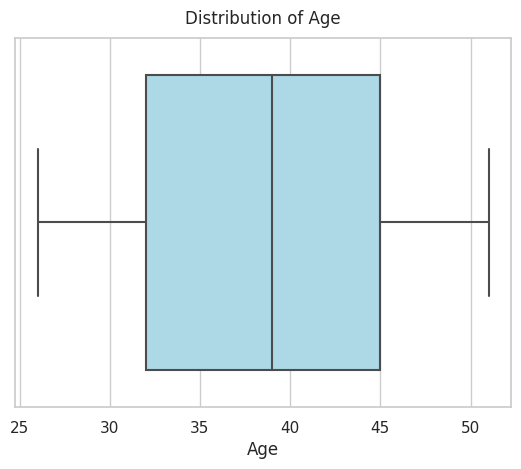

In [14]:
sns.boxplot(x = df["Age"],
           boxprops = dict(facecolor = "lightblue"))
sns.set_theme(style = "whitegrid")
plt.title("Distribution of Age", pad = 10)
plt.show()

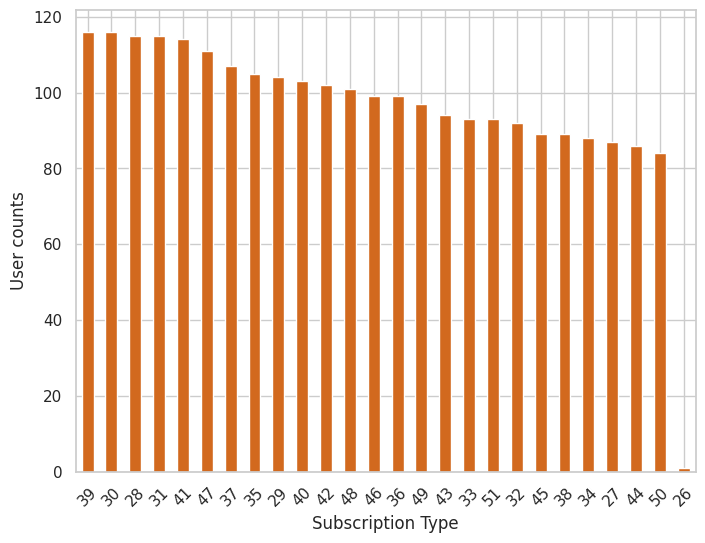

In [15]:
age_count = df["Age"].value_counts()

plt.figure(figsize = (8, 6))
age_count.plot(kind = 'bar', color = 'chocolate')
plt.xlabel('Subscription Type')
plt.ylabel('User counts')
plt.xticks(rotation=45)

plt.show()

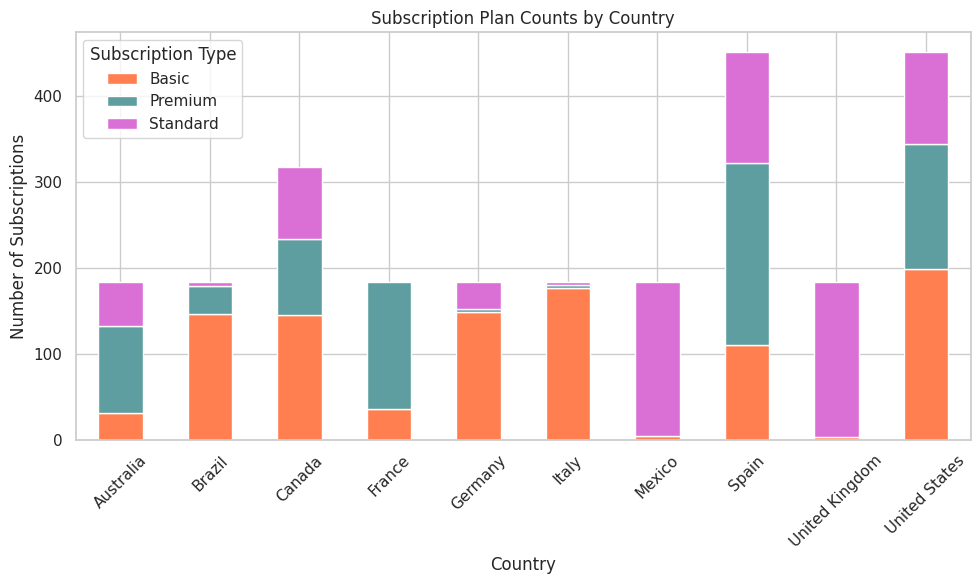

In [16]:
subscription_counts = df.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()

ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6),
                              color = ["coral", "cadetblue", "orchid"] )
plt.title('Subscription Plan Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()

*Korelasyonu hesaplayabilmek için verileri object türünden category türüne çevirelim.*

In [17]:
df["Subscription Type"] = df["Subscription Type"].astype('category')
df["Subscription Type"] = df["Subscription Type"].cat.codes
# Basic = 0
# Premium = 1
# Standard = 2

In [18]:
df["Country"] = df["Country"].astype('category')
df["Country"] = df["Country"].cat.codes
# Australia = 0
# Brazil = 1
# Canada = 2
# France = 3
# Germany = 4
# Italy = 5
# Mexico = 6
# Spain = 7
# United Kingdom = 8
# United States = 9

In [19]:
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes
# Female = 0
# Male = 1

In [20]:
df["Device"] = df["Device"].astype('category')
df["Device"] = df["Device"].cat.codes
# Laptop = 0
# Smart TV = 1
# Smartphone = 2
# Tablet = 3

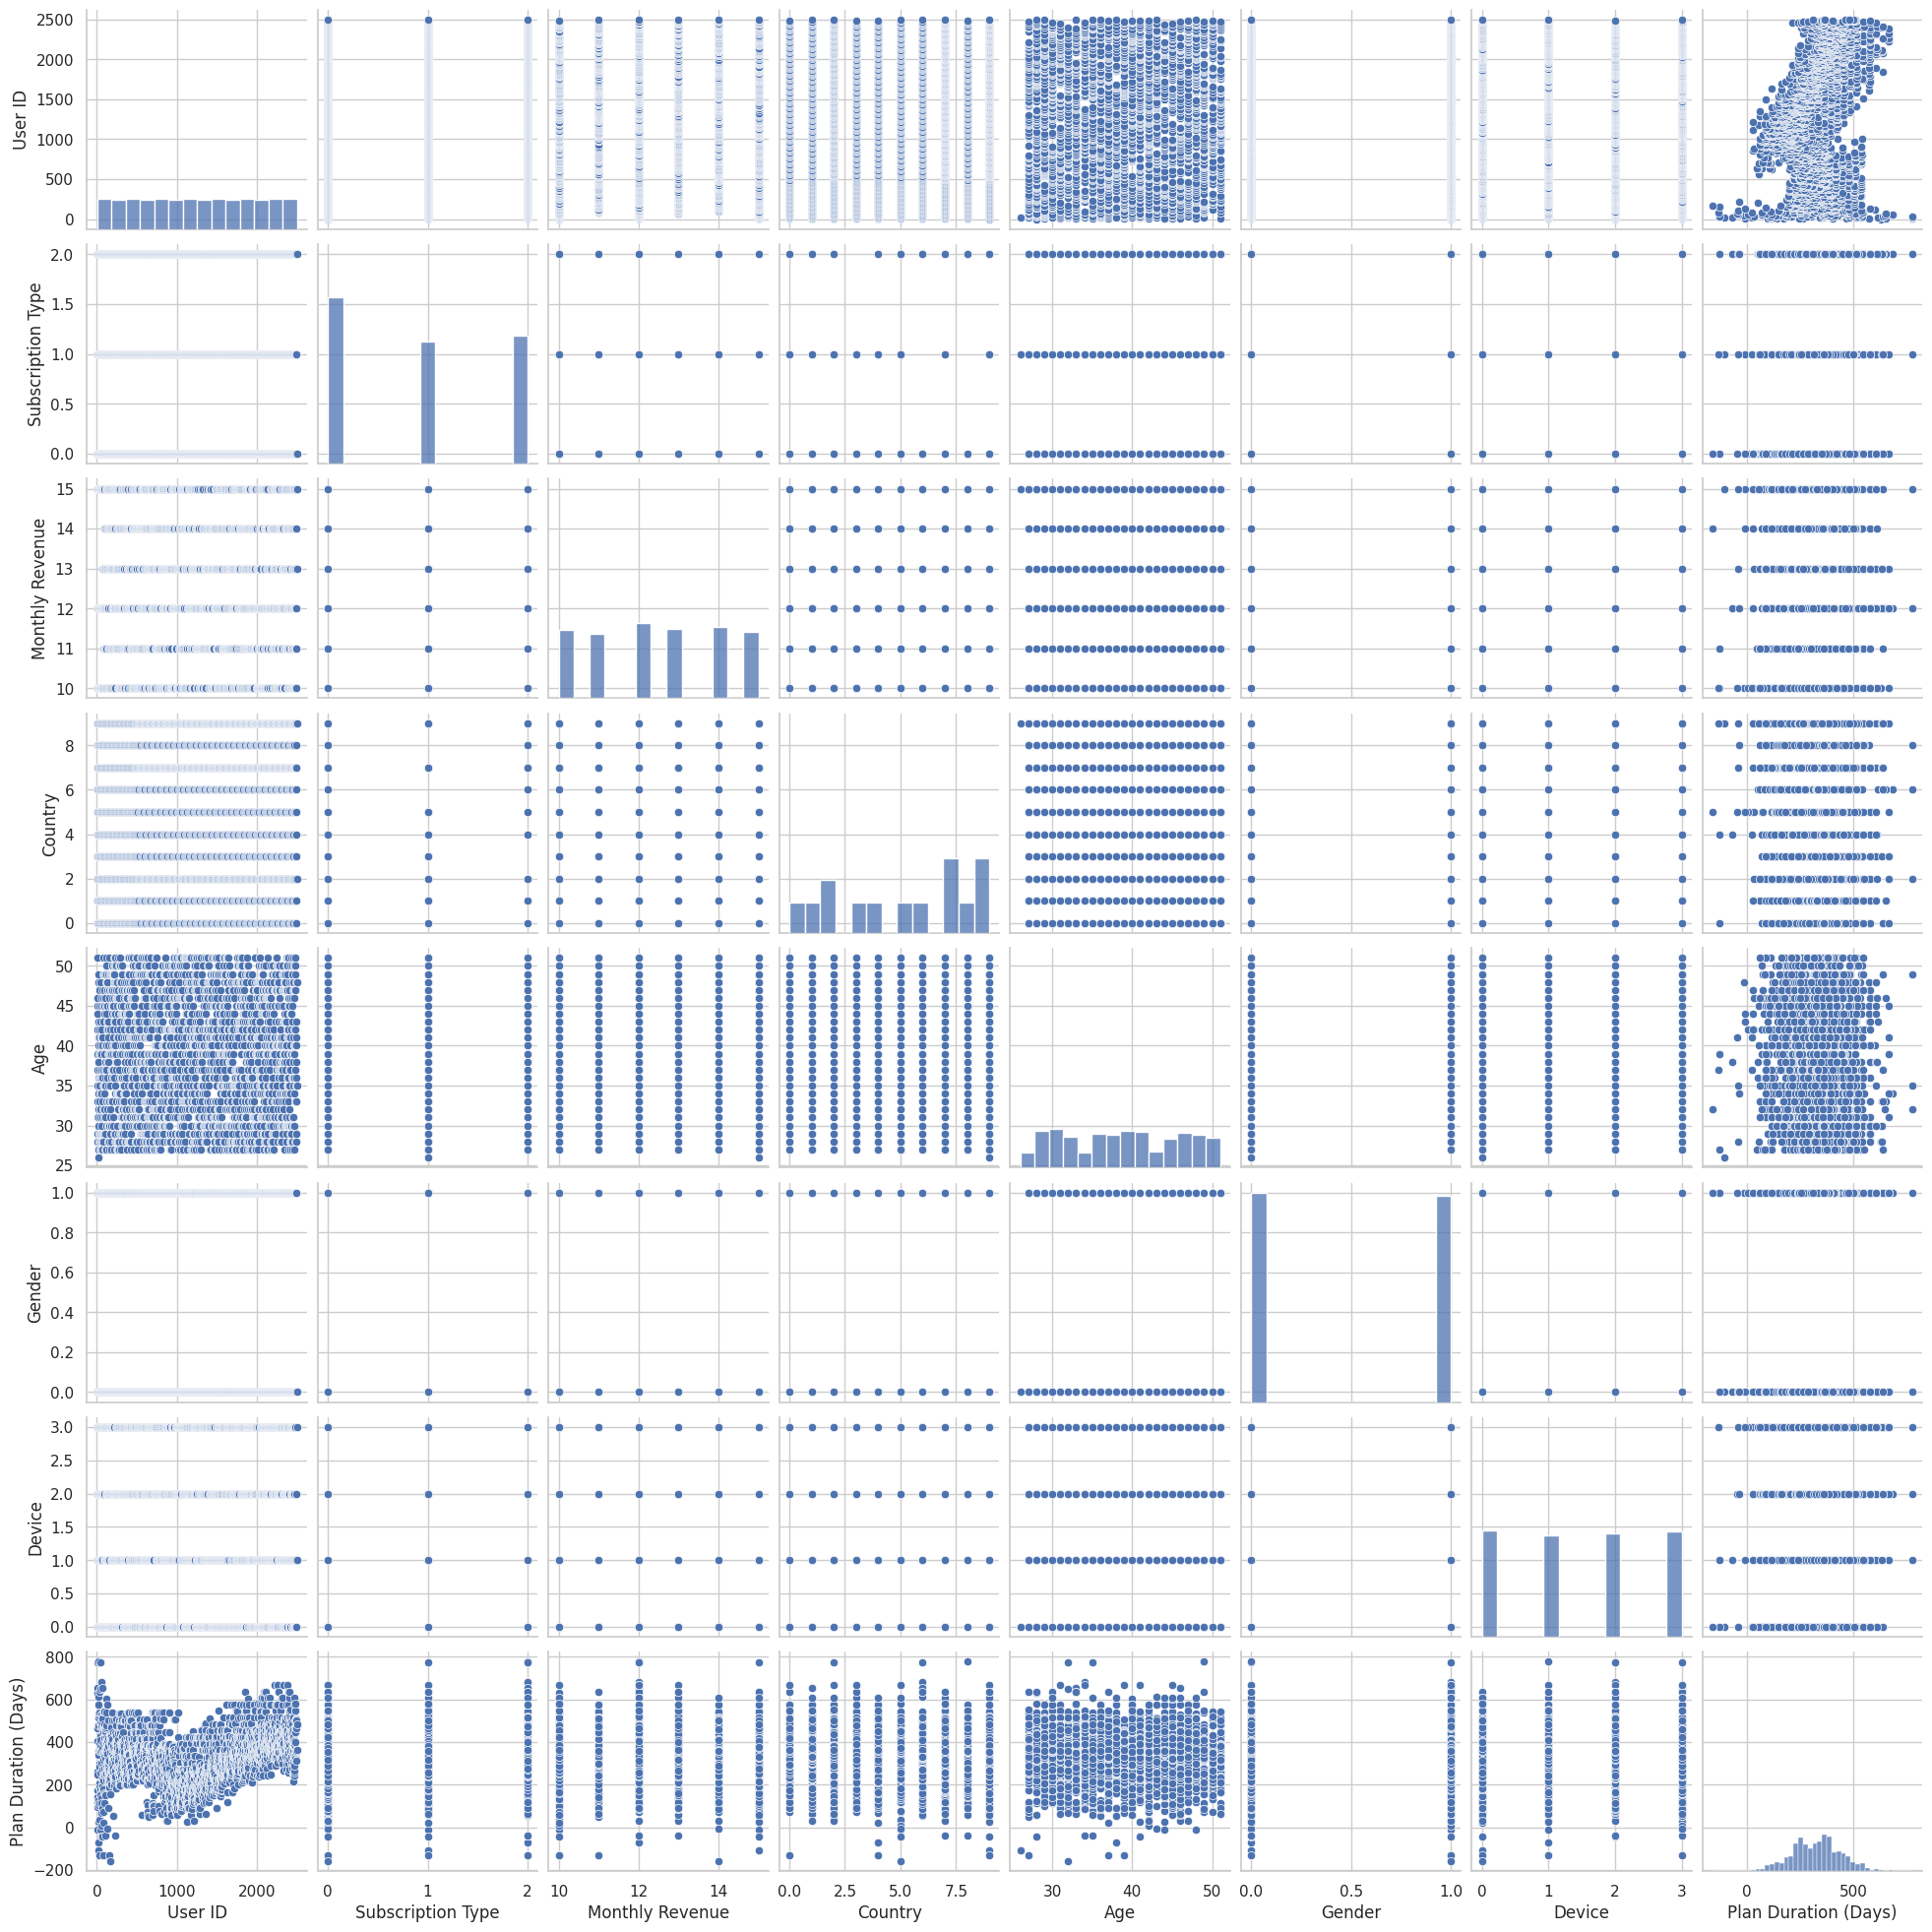

In [ ]:
sns.pairplot(df)

In [21]:
corr = df.corr()
corr

<ipython-input-21-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration (Days)
User ID,1.000000,-0.000957,-0.004809,0.071659,0.008065,-0.015089,0.031691,0.262381
Subscription Type,-0.000957,1.000000,-0.001862,0.200324,0.009399,0.014220,0.015147,0.005680
Monthly Revenue,-0.004809,-0.001862,1.000000,0.024900,-0.021143,-0.006139,-0.001899,-0.004620
Country,0.071659,0.200324,0.024900,1.000000,0.021480,-0.004222,-0.017781,-0.012989
Age,0.008065,0.009399,-0.021143,0.021480,1.000000,-0.039600,-0.014447,-0.031335
Gender,-0.015089,0.014220,-0.006139,-0.004222,-0.039600,1.000000,0.008537,-0.011309
Device,0.031691,0.015147,-0.001899,-0.017781,-0.014447,0.008537,1.000000,0.017507
Plan Duration (Days),0.262381,0.005680,-0.004620,-0.012989,-0.031335,-0.011309,0.017507,1.000000


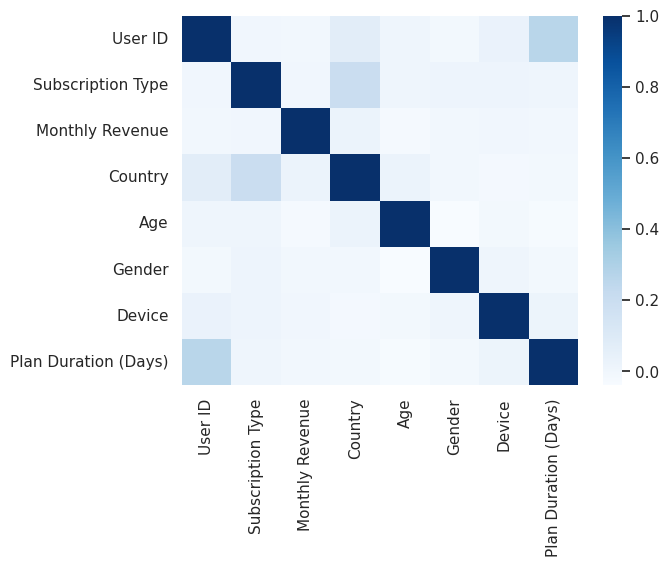

In [26]:
sns.heatmap(corr, cmap = 'Blues')
plt.xticks(rotation=90)
plt.show()

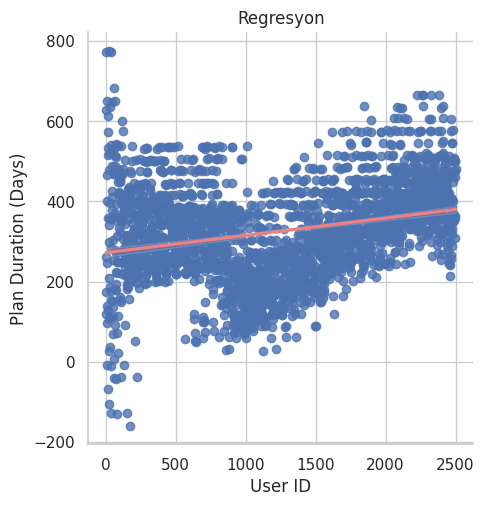

In [30]:
sns.lmplot(x='User ID', y='Plan Duration (Days)', data=df, line_kws={'color': 'lightcoral'})
plt.title("Regresyon")
plt.show()

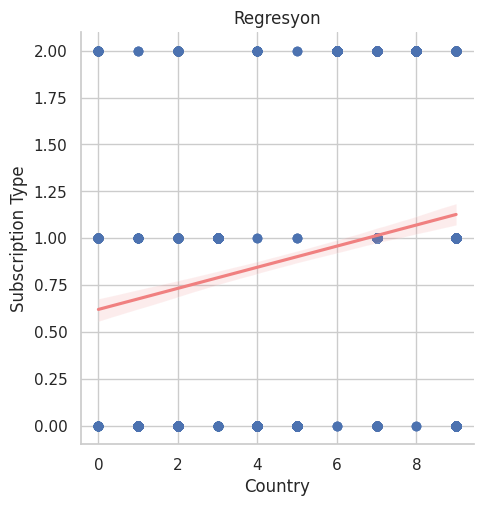

In [29]:
sns.lmplot(y ='Subscription Type', x ='Country', data=df, line_kws={'color': 'lightcoral'})
plt.title("Regresyon")
plt.show()